# Input y Output

Veremos cómo guardar y leer objetos desde archivos ROOT. Un archivo ROOT es como un directorio de archivos UNIX. Puede contener directorios y objetos organizados en un número ilimitado de niveles. También se almacena en formato independiente de la máquina. 

__Ejemplo:__ En este ejemplo se crea un archivo ROOT y 15 histogramas, llena cada histograma con 1000 entradas de una distribución gaussiana y las escribe en el archivo.

In [1]:
#Debemos llamar las diferentes clases que vamos a usar:
from ROOT import TObjArray, TH1F, TFile
# crear un arreglo de root
Hlist = TObjArray(0)

#LLeno la el arreglo con histogramas
for i in range( 15 ):
    name = "Histograma"+str(i)
    title = "Histograma_"+str(i)
    h = TH1F(name,title,100,-4,4)
    h.FillRandom("gaus",100000)
    Hlist.Add(h)
    #Borrando el histograma
    del h
    
# abre un archivo y escribe el arreglo en el archivo
f = TFile("demo.root","RECREATE")
Hlist.Write()
f.Close()

Welcome to JupyROOT 6.22/03


En el ejemplo anterior se usa la opción `RECREATE`, las otras opciones son:

|    Opciones   |                                    Descripciones                                    |
|:-------------:|:-----------------------------------------------------------------------------------:|
| NEW or CREATE | Crea un nuevo archivo y se abre para escribir, si el archivo ya existe, no se abre. |
|    RECREATE   | Crea un nuevo archivo, si el archivo ya existe, se sobrescribirá.                   |
|     UPDATE    | Abre un archivo existente para escribir. Si no existe ningún archivo, se crea.      |
|      READ     | Abre un archivo existente para leerlo (predeterminado).                             |

Una vez que tenemos el objeto `TFile`, podemos llamar al método `TFile.Map()` para ver el diseño físico. La salida imprime la fecha/hora, la dirección del registro de inicio, el número de bytes en el registro, el nombre de clase del registro y el factor de compresión.

In [2]:
#Abrimos un archivo .root y asignamos su contenido al objeto TFile f
f = TFile("demo.root")
#Aplicamos el operador Map() sobre f
f.Map()

20201015/123201  At:100     N=114       TFile         
20201015/123201  At:214     N=561       TH1F           CX =  1.80
20201015/123201  At:775     N=549       TH1F           CX =  1.84
20201015/123201  At:1324    N=555       TH1F           CX =  1.82
20201015/123201  At:1879    N=563       TH1F           CX =  1.80
20201015/123201  At:2442    N=559       TH1F           CX =  1.81
20201015/123201  At:3001    N=563       TH1F           CX =  1.80
20201015/123201  At:3564    N=563       TH1F           CX =  1.80
20201015/123201  At:4127    N=560       TH1F           CX =  1.81
20201015/123201  At:4687    N=555       TH1F           CX =  1.82
20201015/123201  At:5242    N=560       TH1F           CX =  1.81
20201015/123201  At:5802    N=564       TH1F           CX =  1.80
20201015/123201  At:6366    N=562       TH1F           CX =  1.81
20201015/123201  At:6928    N=559       TH1F           CX =  1.82
20201015/123201  At:7487    N=564       TH1F           CX =  1.80
20201015/123201  At:8

## TFile y TKey

El método `Map ()` lee el archivo secuencialmente muestra la información sobre cada registro mientras escanea el archivo. Puesto que ROOT fue creado para manejo de grandes volumenes de datos es factible usar  el acceso secuencial, aleatorio o directo. Para esto último, `TFile` mantiene una lista de `TKeys`, que es esencialmente un índice de los objetos del archivo. La clase `TKey` describe los encabezados de registro de los objetos del archivo. 

__Ejemplo:__ para obtener la lista de claves e imprimirlas (`TFile.GetListOfKeys()`). Para encontrar un objeto específico en el archivo, se usa el método `TFile.Get()`.

In [3]:
#Aplicamos el método Get() sobre f y usamos el método Print() para visualizar
f.GetListOfKeys().Print()
#Cerramos el archivo
f.Close()

Collection name='THashList', class='THashList', size=15
 TKey Name = Histograma0, Title = Histograma_0, Cycle = 1
 TKey Name = Histograma1, Title = Histograma_1, Cycle = 1
 TKey Name = Histograma2, Title = Histograma_2, Cycle = 1
 TKey Name = Histograma3, Title = Histograma_3, Cycle = 1
 TKey Name = Histograma4, Title = Histograma_4, Cycle = 1
 TKey Name = Histograma5, Title = Histograma_5, Cycle = 1
 TKey Name = Histograma6, Title = Histograma_6, Cycle = 1
 TKey Name = Histograma7, Title = Histograma_7, Cycle = 1
 TKey Name = Histograma8, Title = Histograma_8, Cycle = 1
 TKey Name = Histograma9, Title = Histograma_9, Cycle = 1
 TKey Name = Histograma10, Title = Histograma_10, Cycle = 1
 TKey Name = Histograma11, Title = Histograma_11, Cycle = 1
 TKey Name = Histograma12, Title = Histograma_12, Cycle = 1
 TKey Name = Histograma13, Title = Histograma_13, Cycle = 1
 TKey Name = Histograma14, Title = Histograma_14, Cycle = 1


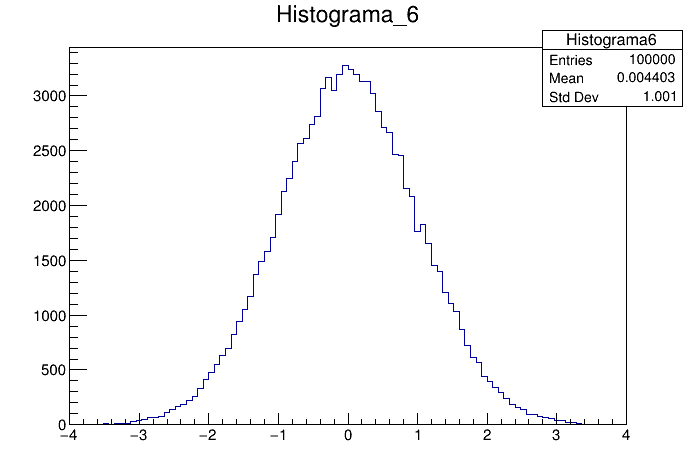

In [4]:
#Debemos llamar las diferentes clases que vamos a usar
from ROOT import TH1F, TFile, TCanvas
#Abrimos un archivo .root y asignamos su contenido al objeto TFile f
f = TFile("demo.root")
#Ahora usemos Get para obtener el Histograma6
Histo_6 = f.Get("Histograma6")
# Ahora se crea un Canvas para dibujar
c1 = TCanvas( 'c1', 'Histograma_6')
#Dibujamos el histograma
Histo_6.Draw()
#Mostramos el canvas.
c1.Draw()

In [5]:
#Cerramos el archivo
f.Close()

## El directorio actual
Cuando se crea un objeto `TFile`, se convierte en el "directorio" actual. Por lo tanto, el último archivo que se abre es siempre el directorio actual. Para verificar su directorio actual, puede usar la clase `gDirectory` y el método de esta clase `pwd()`.

In [6]:
from ROOT import gDirectory
gDirectory.pwd()

PyROOT:/


In [7]:
#Si tiene dos archivos en uso, el último es el que directorio actual
f1 = TFile("File1.root","recreate")
gDirectory.pwd()
f2 = TFile("File2.root","recreate")
gDirectory.pwd()
#Y los cerramos
f1.Close()
f2.Close()

File1.root:/
File2.root:/


## Saving Objects to Disk

### Objetos en memoria y en disco

El método `TFile.ls()` tiene una opción para listar los objetos en el disco ("-d") o los objetos en la memoria ("-m"). Si no se da ninguna opción, enumera ambos, primero los objetos en la memoria, luego los objetos en el disco. 

__Ejemplo:__

In [8]:
#Debemos llamar las diferentes clases que vamos a usar
from ROOT import TH1F, TFile
#Abrimos un archivo .root y asignamos su contenido al objeto TFile f
f = TFile("demo.root")
#Listamos el contenido en disco
print("Contenido en disco \n")
f.ls("-d")

Contenido en disco 

TFile**		demo.root	
 TFile*		demo.root	
  KEY: TH1F	Histograma0;1	Histograma_0
  KEY: TH1F	Histograma1;1	Histograma_1
  KEY: TH1F	Histograma2;1	Histograma_2
  KEY: TH1F	Histograma3;1	Histograma_3
  KEY: TH1F	Histograma4;1	Histograma_4
  KEY: TH1F	Histograma5;1	Histograma_5
  KEY: TH1F	Histograma6;1	Histograma_6
  KEY: TH1F	Histograma7;1	Histograma_7
  KEY: TH1F	Histograma8;1	Histograma_8
  KEY: TH1F	Histograma9;1	Histograma_9
  KEY: TH1F	Histograma10;1	Histograma_10
  KEY: TH1F	Histograma11;1	Histograma_11
  KEY: TH1F	Histograma12;1	Histograma_12
  KEY: TH1F	Histograma13;1	Histograma_13
  KEY: TH1F	Histograma14;1	Histograma_14


In [9]:
#Ahora el contenido en memoria
print("Contenido en memoria \n")
f.ls("-m")

Contenido en memoria 

TFile**		demo.root	
 TFile*		demo.root	


In [10]:
#Y todo
print("Contenido general \n")
f.ls()
#Cerramos el archivo
f.Close()

Contenido general 

TFile**		demo.root	
 TFile*		demo.root	
  KEY: TH1F	Histograma0;1	Histograma_0
  KEY: TH1F	Histograma1;1	Histograma_1
  KEY: TH1F	Histograma2;1	Histograma_2
  KEY: TH1F	Histograma3;1	Histograma_3
  KEY: TH1F	Histograma4;1	Histograma_4
  KEY: TH1F	Histograma5;1	Histograma_5
  KEY: TH1F	Histograma6;1	Histograma_6
  KEY: TH1F	Histograma7;1	Histograma_7
  KEY: TH1F	Histograma8;1	Histograma_8
  KEY: TH1F	Histograma9;1	Histograma_9
  KEY: TH1F	Histograma10;1	Histograma_10
  KEY: TH1F	Histograma11;1	Histograma_11
  KEY: TH1F	Histograma12;1	Histograma_12
  KEY: TH1F	Histograma13;1	Histograma_13
  KEY: TH1F	Histograma14;1	Histograma_14


Para traer un objeto del disco a la memoria, tenemos que usarl el método `Get()` explícitamente. Cuando usamos el objeto, ROOT lo obtiene por nosotros. Cualquier referencia a un objeto se leerá desde el archivo. Por ejemplo, el dibujo de Histograma6 lo leerá del archivo y creará un objeto en la memoria. 

__Ejemplo:__ obtemos el histograma y luego enumeramos el contenido.

In [11]:
#Debemos llamar las diferentes clases que vamos a usar
from ROOT import TH1F, TFile
#Abrimos un archivo .root y asignamos su contenido al objeto TFile f
f = TFile("demo.root")
#Usamos Get para obtener el Histograma6
Histo_6 = f.Get("Histograma6")
#Ahora el contenido en memoria
print("Contenido en memoria")
f.ls("-m")
#Cerramos el archivo
f.Close()

Contenido en memoria
TFile**		demo.root	
 TFile*		demo.root	
  OBJ: TH1F	Histograma6	Histograma_6 : 0 at: 0x685a610


Ahora vemos una nueva línea que comienza con `OBJ`. Esto significa que un objeto de clase `TH1F`, llamado Histograma6 se ha agregado en memoria a este directorio. Este nuevo Histograma6 en memoria es independiente del Histograma6 en disco. Si hacemos cambios al Histograma en la memoria, no se propagan al Histograma en el disco. Se guardará una nueva versión de Histograma6 una vez que llamemos a `Write`.

__Ejemplo:__ Cuando se usa `Get()` En este momento, los objetos en la memoria (OBJ) son idénticos a los objetos en el disco (KEY). Cambiemos eso agregando un algo histograma que tenemos en la memoria.

In [12]:
#Debemos llamar las diferentes clases que vamos a usar
from ROOT import TH1F, TFile, TObject
#Abrimos un archivo .root  en modo escrituray asignamos su contenido al objeto TFile f
f = TFile("demo.root","UPDATE")
#Usamos Get para obtener el Histograma6
Histo_6 = f.Get("Histograma6")
#Agregamos un elemento 
for i in range( 10000 ):
    Histo_6.Fill(0)

In [13]:
print("Contenido general")
f.ls()

Contenido general
TFile**		demo.root	
 TFile*		demo.root	
  OBJ: TH1F	Histograma6	Histograma_6 : 0 at: 0x685a610
  KEY: TH1F	Histograma0;1	Histograma_0
  KEY: TH1F	Histograma1;1	Histograma_1
  KEY: TH1F	Histograma2;1	Histograma_2
  KEY: TH1F	Histograma3;1	Histograma_3
  KEY: TH1F	Histograma4;1	Histograma_4
  KEY: TH1F	Histograma5;1	Histograma_5
  KEY: TH1F	Histograma6;1	Histograma_6
  KEY: TH1F	Histograma7;1	Histograma_7
  KEY: TH1F	Histograma8;1	Histograma_8
  KEY: TH1F	Histograma9;1	Histograma_9
  KEY: TH1F	Histograma10;1	Histograma_10
  KEY: TH1F	Histograma11;1	Histograma_11
  KEY: TH1F	Histograma12;1	Histograma_12
  KEY: TH1F	Histograma13;1	Histograma_13
  KEY: TH1F	Histograma14;1	Histograma_14


Ahora el Histograma6 en la memoria es diferente del histograma (Histograma6) en el disco. Solo una versión del objeto puede estar en la memoria, sin embargo, en el disco podemos almacenar múltiples versiones del objeto. El método `TFile.Write()` escribirá la lista de objetos en el directorio actual en el disco.

In [14]:
#escribimos en disco en otra versión del mismo Objeto (Ver identificador único)
Histo_6.Write()
#Sobre escribir
Histo_6.Write("",TObject.kOverwrite)
#O como uno nuevo
Histo_6.Write("NewHisto6")

563

In [15]:
#Ahora el contenido en memoria
print("Contenido Total \n")
f.ls()

Contenido Total 

TFile**		demo.root	
 TFile*		demo.root	
  OBJ: TH1F	Histograma6	Histograma_6 : 0 at: 0x685a610
  KEY: TH1F	Histograma0;1	Histograma_0
  KEY: TH1F	Histograma1;1	Histograma_1
  KEY: TH1F	Histograma2;1	Histograma_2
  KEY: TH1F	Histograma3;1	Histograma_3
  KEY: TH1F	Histograma4;1	Histograma_4
  KEY: TH1F	Histograma5;1	Histograma_5
  KEY: TH1F	Histograma6;2	Histograma_6
  KEY: TH1F	Histograma6;1	Histograma_6
  KEY: TH1F	Histograma7;1	Histograma_7
  KEY: TH1F	Histograma8;1	Histograma_8
  KEY: TH1F	Histograma9;1	Histograma_9
  KEY: TH1F	Histograma10;1	Histograma_10
  KEY: TH1F	Histograma11;1	Histograma_11
  KEY: TH1F	Histograma12;1	Histograma_12
  KEY: TH1F	Histograma13;1	Histograma_13
  KEY: TH1F	Histograma14;1	Histograma_14
  KEY: TH1F	NewHisto6;1	Histograma_6


El método Write no afectó en absoluto a los objetos en la memoria. Sin embargo, si se cierra el archivo, el directorio se vacía y los objetos de la lista se eliminan.

In [16]:
#Cerramos el archivo
f.Close()
f.ls()

TFile**		demo.root	
 TFile*		demo.root	


## Recuperando objetos del disco

Ya hemos visto como usar objetos desde archivos .root, pero tambien sabemos que varias versiones de un objeto con el mismo nombre podrían estar en un archivo ROOT. En nuestro ejemplo, guardamos un histograma Histograma6 modificado en el archivo, lo que resultó en dos Histograma6 identificados de forma única por el número de ciclo: `Histograma6;1` y `Histograma6;2`. La pregunta es cómo podemos recuperar la versión correcta de Histograma6. Al abrir el archivo y usar Histograma6, `Cling` recupera el que tiene el número de ciclo más alto. Para leer el `Histograma6;1` en la memoria, en lugar del `Histograma6;2` que obtendríamos por defecto, tenemos que obtenerlo explícitamente y asignarlo a una variable.

__Ejemplo:__

In [17]:
#Debemos llamar las diferentes clases que vamos a usar
from ROOT import TH1F, TFile, TObject
#Abrimos un archivo .root  en modo escrituray asignamos su contenido al objeto TFile f
f = TFile("demo.root","UPDATE")
#Usamos Get para obtener el Histograma6
Histo_6 = f.Get("Histograma6;1")
f.ls()

TFile**		demo.root	
 TFile*		demo.root	
  OBJ: TH1F	Histograma6	Histograma_6 : 0 at: 0x685a610
  KEY: TH1F	Histograma0;1	Histograma_0
  KEY: TH1F	Histograma1;1	Histograma_1
  KEY: TH1F	Histograma2;1	Histograma_2
  KEY: TH1F	Histograma3;1	Histograma_3
  KEY: TH1F	Histograma4;1	Histograma_4
  KEY: TH1F	Histograma5;1	Histograma_5
  KEY: TH1F	Histograma6;2	Histograma_6
  KEY: TH1F	Histograma6;1	Histograma_6
  KEY: TH1F	Histograma7;1	Histograma_7
  KEY: TH1F	Histograma8;1	Histograma_8
  KEY: TH1F	Histograma9;1	Histograma_9
  KEY: TH1F	Histograma10;1	Histograma_10
  KEY: TH1F	Histograma11;1	Histograma_11
  KEY: TH1F	Histograma12;1	Histograma_12
  KEY: TH1F	Histograma13;1	Histograma_13
  KEY: TH1F	Histograma14;1	Histograma_14
  KEY: TH1F	NewHisto6;1	Histograma_6


In [18]:
#Cerramos el archivo
f.Close()

# TTree

Ya vimos cómo se pueden guardar los objetos en archivos ROOT. En caso de que desee almacenar grandes cantidades de objetos de la misma clase, ROOT contiene las clases `TTree` y `TNtuple` específicamente para ese propósito. La clase `TTree` está optimizada para reducir el espacio en disco y mejorar la velocidad de acceso. Un `TNtuple` es un TTree que se limita a contener solo números de punto flotante; un `TTree`, por otro lado, puede contener todo tipo de datos, como objetos o matrices, además de todos los tipos simples.

Cuando usamos un `TTree`, llenamos sus _búferes_ de __rama__ con datos de __hoja__ y los búferes se escriben en el disco cuando está lleno. Las ramas, búferes y hojas se explican un poco más adelante, pero por ahora, es importante darse cuenta de que cada objeto no se escribe individualmente, sino que se recopila y escribe por cantidades a la vez.

El `TTree` se utiliza para reducir el espacio de almacenamiento pero es especialmente diseñado para optimizar el acceso a los datos. Un árbol utiliza una jerarquía de ramas y cada rama se puede leer independientemente de cualquier otra rama. Ahora, suponga que `Px` y `Py` son miembros del objeto `evento` (que puede contener decenas de otros miembros), y nos gustaría calcular `Px2 + Py2` para cada evento y crear un histograma del resultado.

Si hubiéramos guardado el millón de eventos sin un TTree, tendríamos que:

- leer cada evento en su totalidad en la memoria
- extraer los Px y Py del evento
- calcular la suma de los cuadrados
- llenar un histograma

Se tendría que hacer un millón de veces!!!! Esto lleva mucho tiempo y realmente no necesitamos leer todo el evento, todo el tiempo. Todo lo que necesitamos son dos pequeños miembros de datos (Px y Py). Por otro lado, si usamos un árbol con una rama que contiene `Px` y otra rama que contiene `Py`, podemos leer todos los valores de `Px` y `Py` solo leyendo las ramas `Px` y `Py`. Esto hace que el uso del `TTree` sea muy atractivo.

## Escribiendo el árbol
La función que escribe el árbol

__Ejemplo:__ Primero, se definen las variables (px, py, pz, random y ev). Luego agregamos una rama para cada una de las variables al árbol, llamando al método `TTree.Branch` para cada variable.

In [19]:
#Debemos llamar las diferentes clases que vamos a usar
from ROOT import TH1F, TFile, TTree, gRandom
from array import array

#Abro un archivo
f = TFile("tree1.root","recreate")

#Creo un objeto TTree o arbol
t1 = TTree("t1","Arbol con variables simpes en sus ramas");

#Utilizo arreglos de floats, enteros y dobles
px     = array( 'f', [ 0 ] )
py     = array( 'f', [ 0 ] )
pz     = array( 'f', [ 0 ] )
ev     = array( 'i', [ 0 ] )
random = array( 'd', [ 0 ] )

#creo ramas en el arbol le paso dichas ramas las referencias a estos arreglos
t1.Branch("px",px,"px/F")
t1.Branch("py",py,"py/F")
t1.Branch("pz",pz,"pz/F")
t1.Branch("ev",ev,"ev/I")
t1.Branch("random",random,"random/D")

#LLenamos el arbol
for i in range(100000):
    gRandom.Rannor(px,py)
    pz[0] = px[0]*px[0] + py[0]*py[0]
    random[0] = gRandom.Rndm()
    ev = i
    t1.Fill()
    
#Y lo guardamos en el archivo
t1.Write()

#Finalmente cerramos el archivo
f.Close()

## Leamos un TTree

In [20]:
#Debemos llamar las diferentes clases que vamos a usar
from ROOT import TH1F, TFile, TCanvas, TTree, TH2F
from array import array
#Abrimos un archivo .root y asignamos su contenido al objeto TFile f
f = TFile("tree1.root")

In [21]:
#Podemos ver que contiene el archivo
f.ls()

TFile**		tree1.root	
 TFile*		tree1.root	
  KEY: TTree	t1;1	Arbol con variables simpes en sus ramas


In [22]:
#Ahora Pongamos el TTree en una variable
tree = f.Get("t1")
#y visualicemos su contenido
tree.Print()

******************************************************************************
*Tree    :t1        : Arbol con variables simpes en sus ramas                *
*Entries :   100000 : Total =         2408816 bytes  File  Size =    1660168 *
*        :          : Tree compression factor =   1.45                       *
******************************************************************************
*Br    0 :px        : px/F                                                   *
*Entries :   100000 : Total  Size=     401424 bytes  File Size  =     372256 *
*Baskets :       13 : Basket Size=      32000 bytes  Compression=   1.08     *
*............................................................................*
*Br    1 :py        : py/F                                                   *
*Entries :   100000 : Total  Size=     401424 bytes  File Size  =     372251 *
*Baskets :       13 : Basket Size=      32000 bytes  Compression=   1.08     *
*...................................................

In [23]:
#Se puede ver las diferentes ramas usando Scan
#tree.Scan("px:random")

In [24]:
#Ponemos las variables que usaremos para leer el TTree
px     = array( 'f', [ 0 ] )
py     = array( 'f', [ 0 ] )
pz     = array( 'f', [ 0 ] )
ev     = array( 'i', [ 0 ] )
random = array( 'd', [ 0 ] )

In [25]:
#
tree.SetBranchAddress("px",px)
tree.SetBranchAddress("py",py)
tree.SetBranchAddress("pz",pz)
tree.SetBranchAddress("random",random)
tree.SetBranchAddress("ev",ev)

4

In [26]:
# Creemos dos histogramas para mostrar dos de las variables
hpx = TH1F("hpx","px distribucion",100,-3,3);
hpxpy = TH2F("hpxpy","py vs px",30,-3,3,30,-3,3);

In [27]:
#Y de manera similar a como se lleno el arbol se lee
for i in range(100000):
    #Nos paramos en la entrada i-esima del arbol 
    tree.GetEntry(i);
    #LLenamos los histogramas
    hpx.Fill(px[0]);
    hpxpy.Fill(px[0],py[0]);

In [28]:
c1 = TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


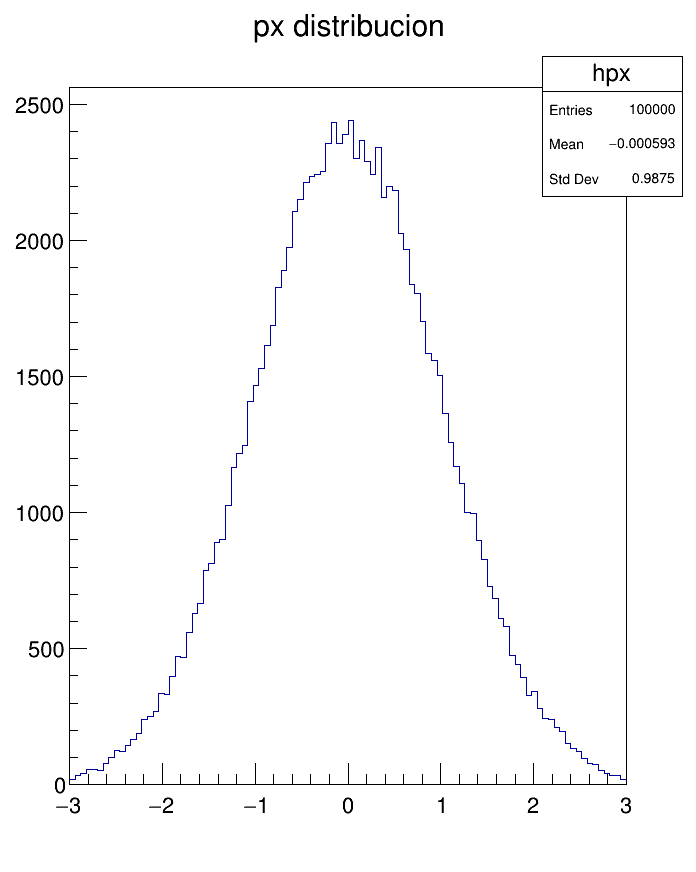

In [29]:
hpx.Draw()
c1.Draw()

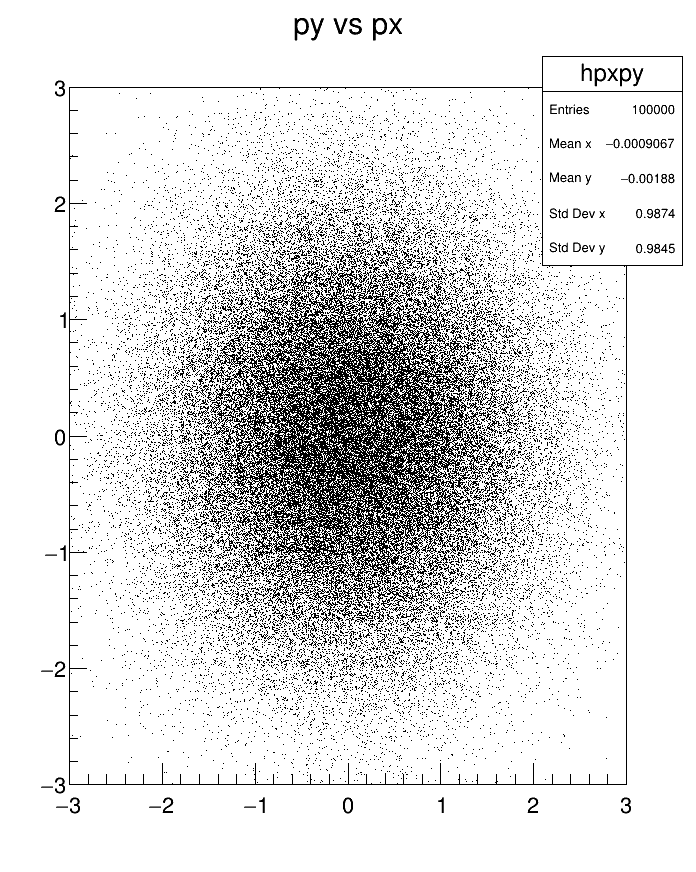

In [30]:
hpxpy.Draw()
c1.Draw()

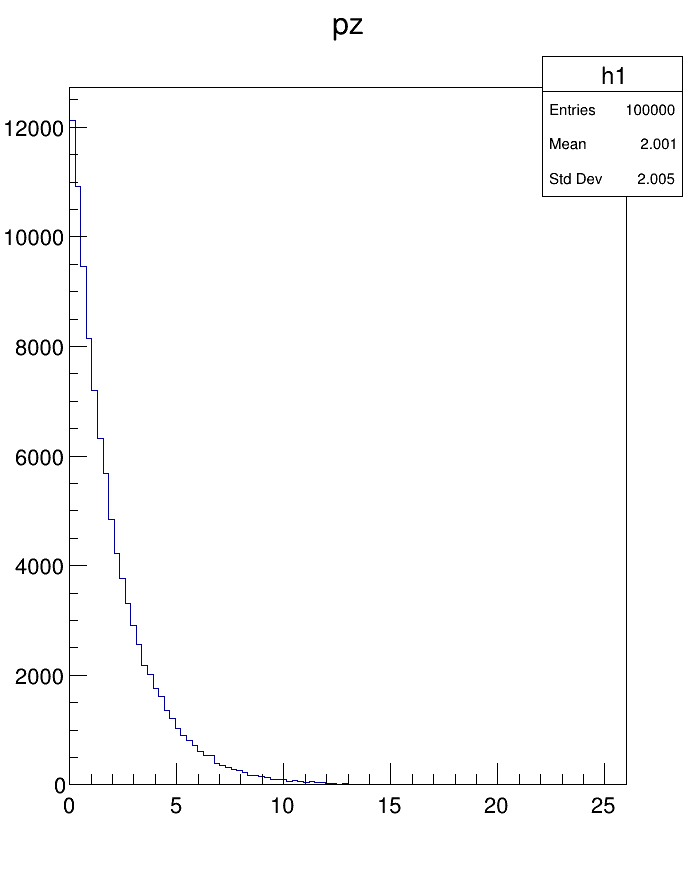

In [31]:
#Tambien se puede usar el TTree directamente para dibujar
tree.Draw("pz>>h1()")
c1.Update()
c1.Draw()

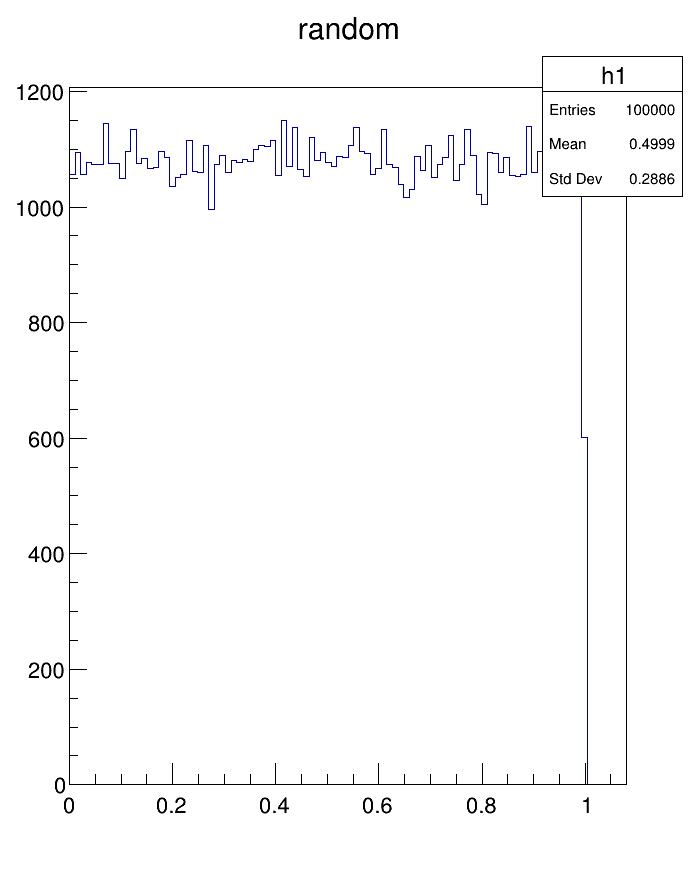

In [32]:
#Tambien se puede usar el TTree directamente para dibujar
tree.Draw("random>>h1()")
c1.Update()
c1.Draw()

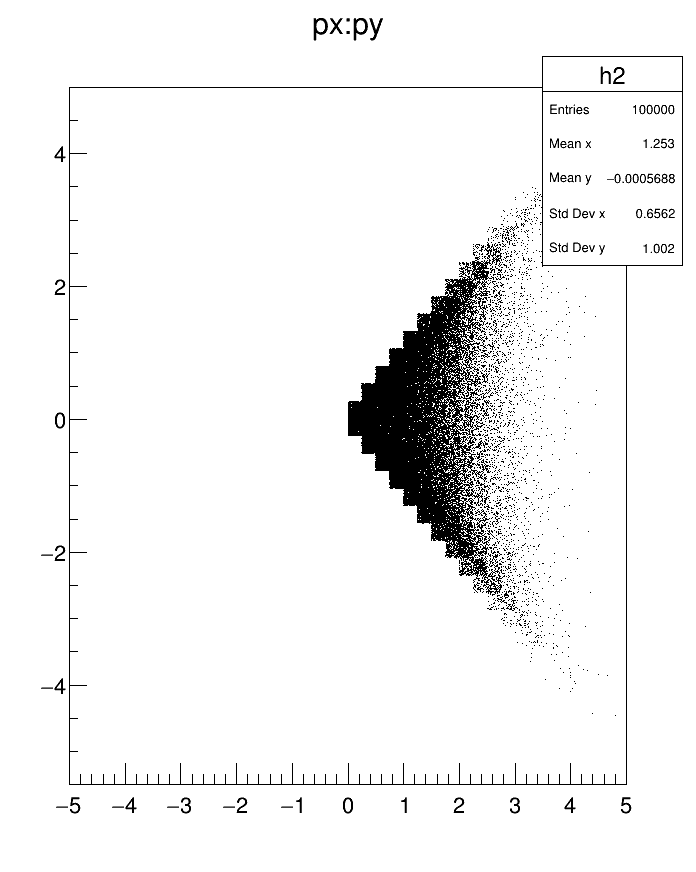

In [35]:
tree.Draw("px:sqrt(pz)>>h2")
c1.Update()
c1.Draw()